In [48]:
from __future__ import print_function
# key libs
import numpy as np
import re
import nltk
import pandas as pd
import glob
import codecs

# nlp libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# processing
from sklearn.model_selection import train_test_split

# LDA
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF


# bring in my pickled vectorizers
import pickle
import dill


In [49]:
# what are we interestd in
# set this up to read the correct set of files we are interested in
topic_model = 'nmf'
n_gram = '1gm' # options - 1gm , 2gm
stem_type = 'lemma' # options - lemma,snow

In [50]:
# set random state
RSEED = 0

### 1. OPEN - SENTIMENT ANALYSIS


In [51]:
sentiment_train=pd.read_csv('../data/sentiment_train.csv')
sentiment_test=pd.read_csv('../data/sentiment_test.csv')
sentiment_train = sentiment_train.drop(columns='Unnamed: 0')
sentiment_test = sentiment_test.drop(columns='Unnamed: 0')
sentiment_train.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,30101,2251,13.372279,0.093364,0.464357
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,56198,4427,12.694375,0.099922,0.490483
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,39627,3042,13.026627,0.109288,0.477824
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,18347,1373,13.362709,0.069424,0.507020
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,21181,1000,21.181000,0.071942,0.471564


In [52]:
sentiment_test.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,14056,1779,7.901068,0.046192,0.528086
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,50905,3621,14.058271,0.071414,0.487210
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,46998,4007,11.728974,0.082732,0.475208
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,8065,213,37.863850,0.148383,0.475731
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,118446,8497,13.939743,0.054021,0.492949


### 2. OPEN - TOPIC MODEL

In [53]:
# open pickled topic model pipeline
topic_pipe = dill.load(open('../data/vectors/'+ topic_model +'_'+ stem_type + '_' + n_gram,'rb'))

In [54]:
# load the train data
topic_train = pd.read_csv('../data/vectors/'+topic_model+'_'+ n_gram+'_'+ stem_type +'_train.csv')
topic_train = topic_train.drop(columns = 'Unnamed: 0')
topic_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,0.049734,0.000000,0.013313,0.031046,0.094106,0.000042,0.000000,0.003954,0.033866,0.000000,0.00000,0.000000,0.024112,0.016215,0.037175
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,0.002097,0.000000,0.008095,0.072340,0.030825,0.000000,0.000000,0.006800,0.008982,0.002681,0.00000,0.000000,0.247304,0.000047,0.000000
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,0.058647,0.000000,0.011558,0.012376,0.108296,0.000000,0.013953,0.003363,0.012292,0.002835,0.00000,0.004707,0.015935,0.000000,0.000000
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,0.046908,0.000477,0.000000,0.021095,0.000000,0.000000,0.003144,0.005293,0.000000,0.002739,0.00000,0.023262,0.000000,0.000000,0.008548
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,0.054830,0.001287,0.024175,0.011042,0.125689,0.000000,0.008057,0.000000,0.005426,0.005772,0.03009,0.000000,0.000000,0.000000,0.005405


In [55]:
# load the test data
topic_test = pd.read_csv('../data/vectors/'+topic_model+'_'+ n_gram+'_'+ stem_type +'_test.csv')
topic_test = topic_test.drop(columns = 'Unnamed: 0')
topic_test.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,0.005446,0.000000,0.002012,0.006462,0.022827,0.000574,0.010053,0.000253,0.017388,0.011574,0.00000,0.008527,0.004229,0.036841,0.000000
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,0.014138,0.000000,0.000000,0.061661,0.010012,0.397639,0.004839,0.008816,0.000000,0.000000,0.00000,0.000000,0.002227,0.000000,0.009618
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,0.021555,0.000000,0.000000,0.018932,0.049229,0.000000,0.001623,0.029185,0.000000,0.000000,0.00000,0.000000,0.005849,0.026485,0.000000
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,0.000000,0.000000,0.015286,0.000000,0.003093,0.000000,0.001815,0.004591,0.009108,0.008289,0.06898,0.001762,0.000000,0.004470,0.000000
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,0.153693,0.004038,0.000000,0.046356,0.025651,0.000000,0.000000,0.000000,0.006931,0.004107,0.00000,0.000000,0.000000,0.000000,0.021348


### 3. JOIN ALL FEATURES
Join topic model features with sentiment analysis features.

In [62]:
print(topic_train.shape)
print(sentiment_train.shape)

(2428, 18)
(2428, 8)


In [63]:
feature_train = pd.merge(topic_train,sentiment_train, on='book_location', how='inner')
feature_test = pd.merge(topic_test,sentiment_test, on='book_location', how='inner')

In [64]:
# train
feature_train = feature_train.drop(columns =['book_title_y','author_name_y'])
feature_train.rename(columns={'book_title_x': 'book_title'}, inplace=True)
feature_train.rename(columns={'author_name_x': 'author_name'}, inplace=True)

# test
feature_test = feature_test.drop(columns =['book_title_y','author_name_y'])
feature_test.rename(columns={'book_title_x': 'book_title'}, inplace=True)
feature_test.rename(columns={'author_name_x': 'author_name'}, inplace=True)

Note : why minmaxscaler ->  because the topics are percentages and range from 0 to 1 not -1 to +1 

In [65]:
# normalize certain columns
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# log transform the counts 
column_names_to_log_1 = ['word_count', 'sentence_count', 'sentence_length']

feature_train.loc[:,column_names_to_log_1] = feature_train.loc[:,column_names_to_log_1].apply(np.log)
feature_test.loc[:,column_names_to_log_1] = feature_test.loc[:,column_names_to_log_1].apply(np.log)

# normalize subjectivity and polarity
column_names_to_normalize = ['subjectivity', 'polarity']

# train
x = feature_train[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = feature_train.index)
feature_train[column_names_to_normalize] = df_temp

# test
y = feature_test[column_names_to_normalize].values
y_scaled = min_max_scaler.transform(y)
df_temp = pd.DataFrame(y_scaled, columns=column_names_to_normalize, index = feature_test.index)
feature_test[column_names_to_normalize] = df_temp

In [66]:
feature_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,0.049734,0.000000,0.013313,0.031046,0.094106,0.000042,0.000000,...,0.00000,0.000000,0.024112,0.016215,0.037175,10.312314,7.719130,2.593184,0.463344,0.438980
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,0.002097,0.000000,0.008095,0.072340,0.030825,0.000000,0.000000,...,0.00000,0.000000,0.247304,0.000047,0.000000,10.936636,8.395477,2.541159,0.481264,0.534175
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,0.058647,0.000000,0.011558,0.012376,0.108296,0.000000,0.013953,...,0.00000,0.004707,0.015935,0.000000,0.000000,10.587266,8.020270,2.566996,0.506857,0.488050
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,0.046908,0.000477,0.000000,0.021095,0.000000,0.000000,0.003144,...,0.00000,0.023262,0.000000,0.000000,0.008548,9.817221,7.224753,2.592468,0.397930,0.594432
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,0.054830,0.001287,0.024175,0.011042,0.125689,0.000000,0.008057,...,0.03009,0.000000,0.000000,0.000000,0.005405,9.960860,6.907755,3.053105,0.404810,0.465239


In [67]:
#log transform all topics
feature_train.loc[:,'topic_1':'topic_15'] = feature_train.loc[:,'topic_1':'topic_15'].apply(np.exp)
feature_test.loc[:,'topic_1':'topic_15'] = feature_test.loc[:,'topic_1':'topic_15'].apply(np.exp)

In [68]:
feature_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,1.050991,1.000000,1.013402,1.031533,1.098676,1.000042,1.000000,...,1.000000,1.000000,1.024405,1.016348,1.037875,10.312314,7.719130,2.593184,0.463344,0.438980
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,1.002099,1.000000,1.008128,1.075021,1.031305,1.000000,1.000000,...,1.000000,1.000000,1.280568,1.000047,1.000000,10.936636,8.395477,2.541159,0.481264,0.534175
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,1.060401,1.000000,1.011625,1.012453,1.114378,1.000000,1.014051,...,1.000000,1.004718,1.016062,1.000000,1.000000,10.587266,8.020270,2.566996,0.506857,0.488050
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,1.048025,1.000477,1.000000,1.021319,1.000000,1.000000,1.003149,...,1.000000,1.023535,1.000000,1.000000,1.008584,9.817221,7.224753,2.592468,0.397930,0.594432
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,1.056361,1.001288,1.024470,1.011103,1.133930,1.000000,1.008089,...,1.030547,1.000000,1.000000,1.000000,1.005419,9.960860,6.907755,3.053105,0.404810,0.465239


In [69]:
feature_test.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,1.005461,1.000000,1.002014,1.006483,1.023089,1.000574,1.010103,...,1.000000,1.008563,1.004238,1.037529,1.000000,9.550805,7.483807,2.066998,0.334446,0.671189
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,1.014238,1.000000,1.000000,1.063602,1.010062,1.488307,1.004851,...,1.000000,1.000000,1.002230,1.000000,1.009665,10.837716,8.194506,2.643211,0.403368,0.522250
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,1.021789,1.000000,1.000000,1.019112,1.050461,1.000000,1.001624,...,1.000000,1.000000,1.005866,1.026839,1.000000,10.757860,8.295798,2.462062,0.434294,0.478516
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,1.000000,1.000000,1.015404,1.000000,1.003098,1.000000,1.001817,...,1.071414,1.001764,1.000000,1.004480,1.000000,8.995289,5.361292,3.633997,0.613686,0.480421
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,1.166132,1.004046,1.000000,1.047447,1.025983,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.021577,11.682212,9.047468,2.634744,0.355840,0.543159


In [70]:
# write to file
feature_train.to_csv('../data/final_train.csv')
feature_test.to_csv('../data/final_test.csv')

In [71]:
dill.dump(min_max_scaler, open('../data/vectors/scaler','wb'))

### 4. CLUSTERING HARD

In [72]:
feature_train.describe()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000
mean,1.031751,1.018059,1.025748,1.022932,1.031457,1.007844,1.015872,1.012073,1.020441,1.018183,1.017066,1.022814,1.010644,1.020737,1.014836,10.665799,7.677193,2.988606,0.467877,0.534923
std,0.033375,0.048987,0.049756,0.040438,0.042374,0.053195,0.034058,0.049491,0.037199,0.046143,0.045033,0.042430,0.036746,0.047163,0.044257,1.171656,1.214330,0.365530,0.094451,0.103872
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.634790,1.945910,1.703204,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.010771,7.012114,2.761997,0.405117,0.476121
50%,1.023501,1.000000,1.005850,1.003759,1.013752,1.000000,1.001100,1.000000,1.002978,1.003043,1.001159,1.003262,1.000000,1.000600,1.000214,10.966973,7.989729,2.993788,0.466642,0.540261
75%,1.051589,1.008766,1.027608,1.028409,1.047925,1.000788,1.014128,1.004962,1.023756,1.018457,1.014104,1.027360,1.006467,1.017791,1.013623,11.500777,8.545245,3.218942,0.529624,0.596346
max,1.179549,1.354620,1.407075,1.286383,1.247584,1.547254,1.255891,1.561024,1.272661,1.519772,1.483465,1.388760,1.429378,1.442535,1.611421,13.082641,10.327938,4.597774,1.000000,1.000000


In [73]:
X = feature_train.iloc[:,3:]

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
list_num_clusters = list(range(1,30))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

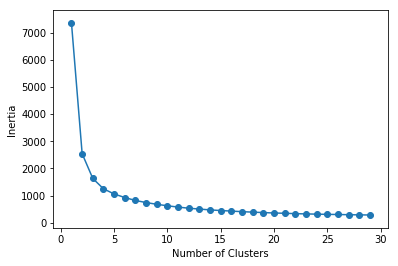

In [75]:
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

try clusters at 10 or 15/16

In [ ]:
# from sklearn.cluster import KMeans
# num_clusters = 10
# km = KMeans(n_clusters=num_clusters)
# km.fit(X)
# #display_cluster(X,km,num_clusters)

In [ ]:
# clustered = km.transform(X)

In [ ]:
# km.cluster_centers_

Component's weights: 
 [[ 0.07  0.07  0.07  0.07  0.07  0.07  0.07  0.07  0.07  0.07  0.07  0.07
   0.07  0.07  0.07  0.76  0.55  0.21  0.03  0.04]
 [ 0.11  0.13  0.13  0.11  0.11  0.13  0.12  0.11  0.13  0.13  0.13  0.12
   0.12  0.12  0.14  0.06 -0.58  0.65  0.08  0.06]]
Perc of Variance Explained: 
 [0.78 0.18]


Text(0.5,1,'Segregation of Topic Clusters')

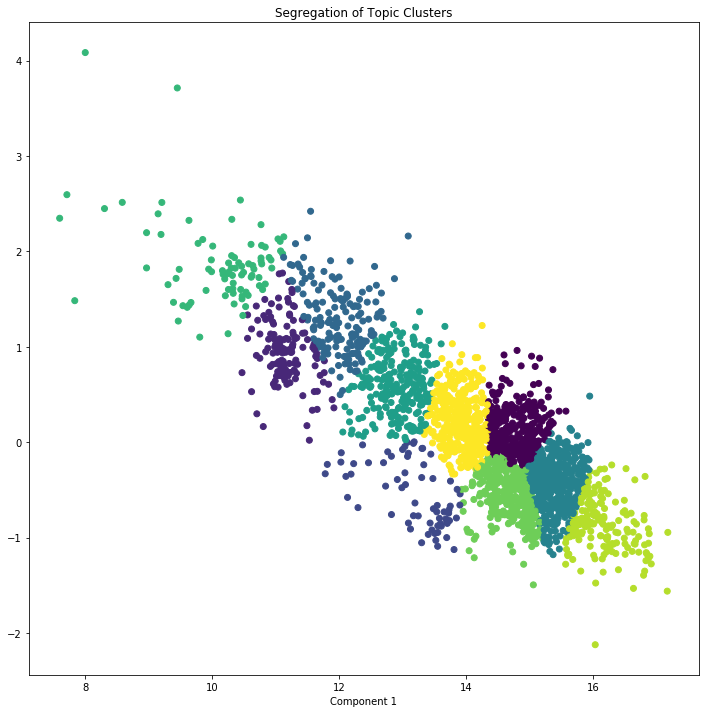

In [77]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
clusters = KMeans(n_clusters=10, random_state=RSEED).fit_predict(X)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(X)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )